In [69]:
import pandas as pd
import numpy as np
import hvplot.pandas
from pathlib import Path
from bokeh.models import HoverTool
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
# Using the read_csv function and Path module, create a DataFrame 
# by importing the data csv file from the Resources folder
csv_path = Path("./Resources/owid-co2-data.csv")
emissions_df = pd.read_csv(csv_path)

# Review the first and last five rows of the DataFrame
print(emissions_df.head())
print(emissions_df.tail())

       country  year iso_code  population  gdp  cement_co2  \
0  Afghanistan  1850      AFG   3752993.0  NaN         NaN   
1  Afghanistan  1851      AFG   3769828.0  NaN         NaN   
2  Afghanistan  1852      AFG   3787706.0  NaN         NaN   
3  Afghanistan  1853      AFG   3806634.0  NaN         NaN   
4  Afghanistan  1854      AFG   3825655.0  NaN         NaN   

   cement_co2_per_capita  co2  co2_growth_abs  co2_growth_prct  ...  \
0                    NaN  NaN             NaN              NaN  ...   
1                    NaN  NaN             NaN              NaN  ...   
2                    NaN  NaN             NaN              NaN  ...   
3                    NaN  NaN             NaN              NaN  ...   
4                    NaN  NaN             NaN              NaN  ...   

   share_global_other_co2  share_of_temperature_change_from_ghg  \
0                     NaN                                   NaN   
1                     NaN                                 0.165   

In [72]:
# Create Second Dataframe with no Summary Data
country_emissions_df = emissions_df.copy()
country_emissions_df['iso_code'].replace('', np.nan, inplace=True)
country_emissions_df.dropna(subset = ['iso_code'], inplace=True)

country_emissions_df

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.165,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.163,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50593,Zimbabwe,2017,ZWE,14751101.0,2.194784e+10,0.469,0.032,9.596,-0.937,-8.899,...,NaN,0.114,0.001,0.001,0.002,0.0,115.59,28.30,0.910,9.486
50594,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,0.558,0.037,11.795,2.199,22.920,...,NaN,0.114,0.001,0.001,0.002,0.0,118.22,30.83,0.771,6.537
50595,Zimbabwe,2019,ZWE,15354606.0,NaN,0.570,0.037,11.115,-0.681,-5.772,...,NaN,0.113,0.001,0.001,0.002,0.0,117.96,30.53,0.978,8.795
50596,Zimbabwe,2020,ZWE,15669663.0,NaN,0.570,0.036,10.608,-0.507,-4.559,...,NaN,0.112,0.001,0.001,0.002,0.0,NaN,NaN,1.006,9.481


In [74]:
# Create a visual aggregation explore the population by year
population_by_year = emissions_df[emissions_df['year']>=1800]

population_by_year.hvplot.bar(x='year', y='population', 
                                 yformatter='%.0f', 
                                 ylabel='Population',
                                 groupby='country',
                                 yticks=(5), xlabel='Year',
                                 color='green',
                                 title='Population by Country by Year')

:DynamicMap   [country]
   :Bars   [year]   (population)

In [75]:
# Create a visual aggregation explore the emissions by year
ghg_by_year = emissions_df[emissions_df['year']>=1990]

ghg_by_year.hvplot.line(x='year', y='total_ghg', 
                                 yformatter='%.0f', 
                                 ylabel='Total GHG',
                                 groupby='country',
                                 yticks=(5), xlabel='Year',
                                 title='Total GHG by Country by Year')

:DynamicMap   [country]
   :Curve   [year]   (total_ghg)

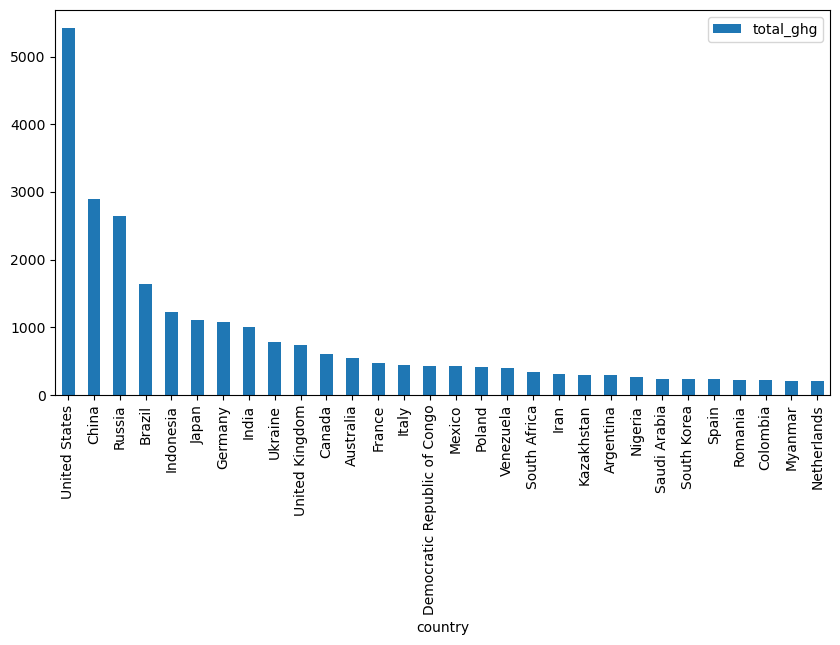

In [79]:
top_ghg_by_year = country_emissions_df[country_emissions_df['year']==1990].sort_values(by='total_ghg', ascending=False).head(30).plot.bar(x='country',y='total_ghg',figsize=(10,5));